In [78]:
import pandas as pd
myData = pd.read_csv(r'C:\Users\eosborn3\Downloads\cars_classification.csv')

In [79]:
from sklearn.model_selection import train_test_split


x = myData.drop('brand', axis = 1)

y = myData['brand']


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 3, stratify = y)

In [87]:
from sklearn.tree import DecisionTreeClassifier

ct = DecisionTreeClassifier(max_depth = 10, min_samples_split = 2, random_state = 1)
ct.fit(x_train, y_train)
testpredictions = ct.predict(x_test)

from sklearn.metrics import accuracy_score
print('test accuracy',accuracy_score(y_test,testpredictions))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,testpredictions))

test accuracy 0.765625
[[ 5  5  2]
 [ 2  6  5]
 [ 0  1 38]]


ValueError: Unknown label type: 'continuous'

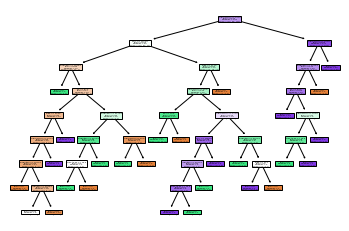

In [46]:
import matplotlib.pyplot as plt
from sklearn import tree

tree.plot_tree(ct, filled = True, feature_names = x_train.columns);

In [48]:
Cars2 = pd.read_csv(r'C:\Users\eosborn3\Downloads\cars_regression.csv')

In [49]:
Cars2.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


In [70]:
from sklearn.model_selection import train_test_split


X = Cars2.drop('mpg', axis = 1)

y = Cars2['mpg']


X_Train, X_test, y_Train, y_Test = train_test_split(X,y, test_size = 0.25, random_state = 3)

In [88]:
#single tree
from sklearn.tree import DecisionTreeRegressor

rt = DecisionTreeRegressor(max_depth = 10, min_samples_split = 2, random_state = 3)
rt.fit(X_Train, y_Train)
testPredictions = rt.predict(X_test)

#to evaluate
import numpy as np
from sklearn.metrics import mean_squared_error as MSE

print('test RMSE', MSE(y_Test,testPredictions)**0.5)
print('test corr', np.corrcoef(y_Test,testPredictions)[0,1])

test RMSE 3.368482003357661
test corr 0.9142168713624408


In [3]:
import pandas as pd

CarCT = pd.read_csv(r'C:\Users\eosborn3\Downloads\cars_classification.csv')

In [4]:
CarCT.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US
1,31.9,4,89,71,1925,14,1980,Europe
2,17.0,8,302,140,3449,11,1971,US
3,15.0,8,400,150,3761,10,1971,US
4,30.5,4,98,63,2051,17,1978,US


In [6]:
from sklearn.model_selection import train_test_split

X = CarCT.drop('brand', axis = 1)

Y = CarCT['brand']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 3, stratify = Y)


In [8]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 1000, min_samples_split = 2, random_state = 1)
RF.fit(X_train, Y_train)
testPred = RF.predict(X_test)

from sklearn.metrics import accuracy_score
print('test accuracy', accuracy_score(Y_test,testPred))

test accuracy 0.890625


In [11]:
# Bagging

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth = 10, random_state = 1, min_samples_split = 2 )

BC = BaggingClassifier(base_estimator = DT, n_estimators = 1000)

BC.fit(X_train, Y_train)
testPred = BC.predict(X_test)

from sklearn.metrics import accuracy_score
print('test accuracy',accuracy_score(Y_test,testPred))


test accuracy 0.875


In [15]:
# Boosting

from sklearn.ensemble import GradientBoostingClassifier

BModel = GradientBoostingClassifier(random_state = 1, n_estimators = 1000, learning_rate = 0.01, max_depth = 3)

BModel.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score

Testpred = BModel.predict(X_test)
print('test accuracy',accuracy_score(Y_test,Testpred))

TrainPred = BModel.predict(X_train)
print('train accuracy',accuracy_score(Y_train,TrainPred))


test accuracy 0.890625
train accuracy 1.0


In [2]:
import pandas as pd

CarReg = pd.read_csv(r'C:\Users\eosborn3\Downloads\cars_regression.csv')

In [3]:
CarReg.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


In [4]:
from sklearn.model_selection import train_test_split


X = CarReg.drop('mpg', axis = 1)

Y = CarReg['mpg']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 3)

In [5]:
# Random Forest (Regression)

from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators = 1000, min_samples_split = 2, random_state = 1)

RF.fit(X_train,Y_train)

Rpred = RF.predict(X_test)

import numpy as np
from sklearn.metrics import mean_squared_error as MSE

print('test RMSE:', MSE(Y_test,Rpred)**0.5)


test RMSE: 2.9045183432186525


In [6]:
# Bagging (Regression)

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(max_depth = 10, min_samples_split = 2, random_state = 1)

BR = BaggingRegressor(base_estimator = DTR, n_estimators = 1000)

BR.fit(X_train, Y_train)


from sklearn.metrics import mean_squared_error as MSE

Tpred = BR.predict(X_test)
print('test RMSE:', MSE(Y_test, Tpred)**0.5)


test RMSE: 2.8881004278506945


In [7]:
# Boosting (Regression)

from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.01, max_depth = 3, random_state = 1)

GBR.fit(X_train, Y_train)

TestPred = GBR.predict(X_test)



from sklearn.metrics import mean_squared_error as MSE

print('test RMSE:',MSE(Y_test,TestPred)**0.5)



test RMSE: 2.915870536717354
